In [ ]:
import polars as pl
import matplotlib.pyplot as plt

## Extract

In [ ]:
df_life_expectancy = pl.read_csv('data/life-expectancy.csv')
df_life_expectancy

Entity,Code,Year,life_expectancy_0
str,str,i64,f64
"""Afghanistan""","""AFG""",1950,28.1563
"""Afghanistan""","""AFG""",1951,28.5836
"""Afghanistan""","""AFG""",1952,29.0138
"""Afghanistan""","""AFG""",1953,29.4521
"""Afghanistan""","""AFG""",1954,29.6975
…,…,…,…
"""Zimbabwe""","""ZWE""",2019,61.0603
"""Zimbabwe""","""ZWE""",2020,61.53
"""Zimbabwe""","""ZWE""",2021,60.1347


## Transform

In [ ]:
df_life_expectancy = df_life_expectancy.rename({'Entity': 'Country','life_expectancy_0': 'life_expectancy (Years)'})

In [ ]:
df_life_expectancy = df_life_expectancy.with_columns(
    pl.col('life_expectancy (Years)').cast(pl.Int64)
)

In [ ]:
df_life_expectancy = df_life_expectancy.filter(
    pl.col('Year') >= 1950
)

In [ ]:
df_life_expectancy.head()

Country,Code,Year,life_expectancy (Years)
str,str,i64,i64
"""Afghanistan""","""AFG""",1950,28
"""Afghanistan""","""AFG""",1951,28
"""Afghanistan""","""AFG""",1952,29
"""Afghanistan""","""AFG""",1953,29
"""Afghanistan""","""AFG""",1954,29


In [ ]:
mean_by_country = df_life_expectancy.group_by('Country').agg(
    pl.col('life_expectancy (Years)').mean().round(2)
).sort('life_expectancy (Years)', descending=True)

In [ ]:
mean_by_country.head()

Country,life_expectancy (Years)
str,f64
"""Monaco""",77.62
"""Andorra""",77.55
"""San Marino""",77.5
"""Iceland""",76.89
"""Sweden""",76.82


In [ ]:
higher_averages = mean_by_country.head()
higher_averages

Country,life_expectancy (Years)
str,f64
"""Monaco""",77.62
"""Andorra""",77.55
"""San Marino""",77.5
"""Iceland""",76.89
"""Sweden""",76.82


In [ ]:
lower_averages = mean_by_country.tail()
lower_averages

Country,life_expectancy (Years)
str,f64
"""East Timor""",44.2
"""Niger""",44.09
"""Mali""",43.24
"""Sierra Leone""",42.92
"""South Sudan""",37.34


In [ ]:
bra_life_expectancy = df_life_expectancy.filter(
    pl.col('Code') == 'BRA'
)

In [ ]:
bra_life_expectancy.head()

Country,Code,Year,life_expectancy (Years)
str,str,i64,i64
"""Brazil""","""BRA""",1950,48
"""Brazil""","""BRA""",1951,49
"""Brazil""","""BRA""",1952,49
"""Brazil""","""BRA""",1953,49
"""Brazil""","""BRA""",1954,50


In [ ]:
top5_ha = higher_averages.select('Country').to_series().implode()
top5_la = lower_averages.select('Country').to_series().implode()

In [ ]:
top5_ha_historic = df_life_expectancy.filter(
    pl.col('Country').is_in(top5_ha)
)
top5_la_historic = df_life_expectancy.filter(
    pl.col('Country').is_in(top5_la)
)

In [ ]:
top5_ha.to_list()[0]

['Monaco', 'Andorra', 'San Marino', 'Iceland', 'Sweden']

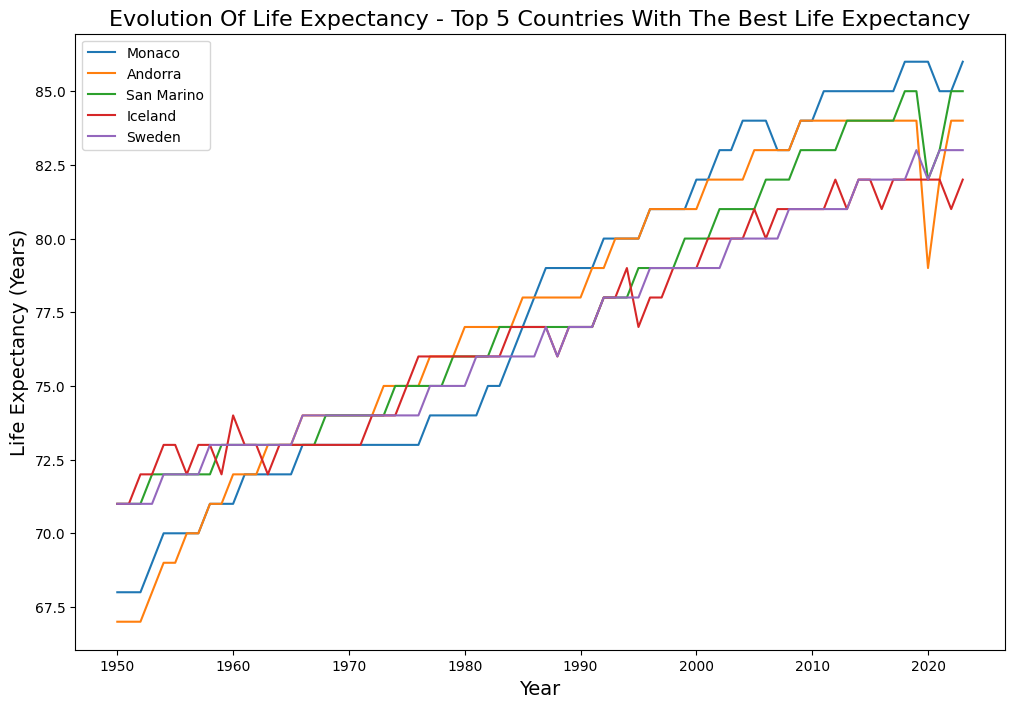

In [ ]:
plt.figure(figsize=(12, 8))
for country in top5_ha.to_list()[0]:
    df_country = top5_ha_historic.filter(pl.col('Country') == country)
    plt.plot(df_country['Year'], df_country['life_expectancy (Years)'], label=country)
plt.legend()
plt.xlabel("Year", fontsize=14)
plt.ylabel("Life Expectancy (Years)", fontsize=14)
plt.title("Evolution Of Life Expectancy - Top 5 Countries With The Best Life Expectancy", fontsize=16)
plt.show()

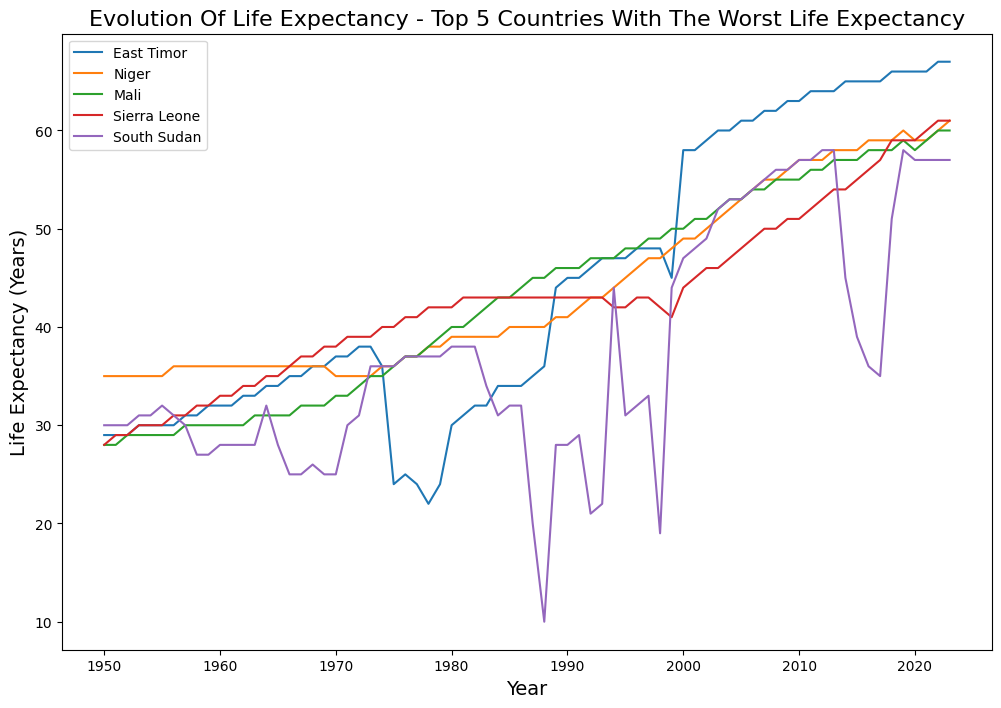

In [ ]:
plt.figure(figsize=(12, 8))
for country in top5_la.to_list()[0]:
    df_country = top5_la_historic.filter(pl.col('Country') == country)
    plt.plot(df_country['Year'], df_country['life_expectancy (Years)'], label=country)
plt.legend()
plt.xlabel("Year", fontsize=14)
plt.ylabel("Life Expectancy (Years)", fontsize=14)
plt.title("Evolution Of Life Expectancy - Top 5 Countries With The Worst Life Expectancy", fontsize=16)
plt.show()

In [ ]:
top5_ha_historic.filter(
    pl.col('Country') == 'Monaco'
)

Country,Code,Year,life_expectancy (Years)
str,str,i64,i64
"""Monaco""","""MCO""",1950,68
"""Monaco""","""MCO""",1951,68
"""Monaco""","""MCO""",1952,68
"""Monaco""","""MCO""",1953,69
"""Monaco""","""MCO""",1954,70
…,…,…,…
"""Monaco""","""MCO""",2019,86
"""Monaco""","""MCO""",2020,86
"""Monaco""","""MCO""",2021,85


Text(0.5, 1.0, 'Evolution Of The Life Expectancy - Top 3 Countries With The Best Life Expectancy x Brazil')

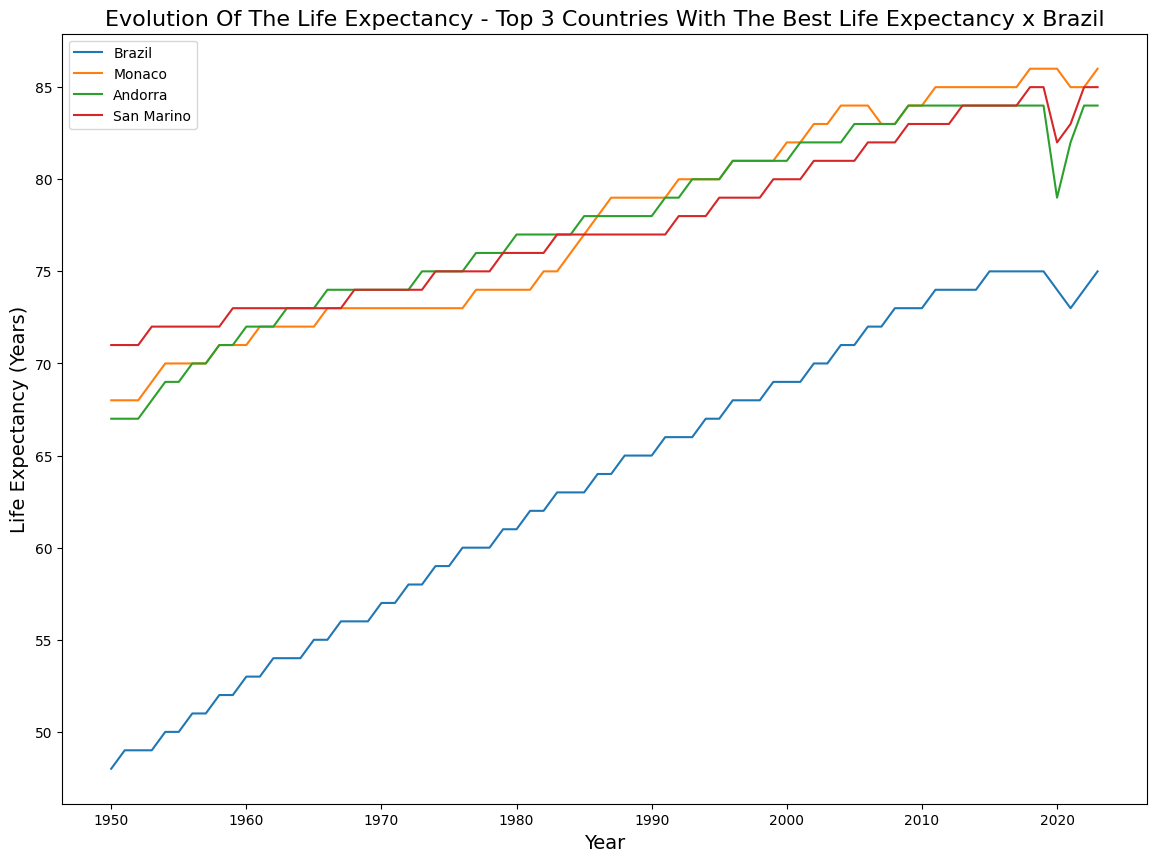

In [ ]:
plt.figure(figsize=(14, 10))
plt.plot(bra_life_expectancy['Year'], bra_life_expectancy['life_expectancy (Years)'], label='Brazil')
for country in top5_lmc.to_list()[0][:3]:
    df_country = top5_ha_historic.filter(pl.col('Country') == country)
    plt.plot(df_country['Year'], df_country['life_expectancy (Years)'], label=country)
plt.legend()
plt.xlabel("Year", fontsize=14)
plt.ylabel("Life Expectancy (Years)", fontsize=14)
plt.title("Evolution Of The Life Expectancy - Top 3 Countries With The Best Life Expectancy x Brazil", fontsize=16)

## Load

In [ ]:
output_path = 'data/'
df_life_expectancy.write_csv(f'{output_path}processed_data.csv') 